In [1]:
pip install --upgrade --ignore-installed kaggle

     -------------------------------------- 83.6/83.6 kB 666.8 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
     ------------------------------------ 162.5/162.5 kB 750.2 kB/s eta 0:00:00
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
     ---------------------------------------- 78.3/78.3 kB 1.1 MB/s eta 0:00:00
     ------------------------------------ 104.6/104.6 kB 600.9 kB/s eta 0:00:00
     ------------------------------------ 162.8/162.8 kB 815.6 kB/s eta 0:00:00
     -------------------------------------- 78.2/78.2 kB 870.7 kB/s eta 0:00:00
     -------------------------------------- 61.6/61.6 kB 827.9 kB/s eta 0:00:00
     ------------------------------------ 100.4/100.4 kB 958.9 kB/s eta 0:00:00
  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
  Created wheel for k

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.
botocore 1.27.28 requires urllib3<1.27,>=1.25.4, but you have urllib3 2.1.0 which is incompatible.


In [4]:
import numpy as np

In [7]:
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import layers 
from keras import models
from keras import optimizers 
from keras.models import Model, Sequential

In [2]:
import os

In [3]:
import random

In [4]:
import matplotlib.image as mpimg


In [1]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

In [2]:
def getimg(directory):
    Images = []
    Labels = []  # 0 for Building, 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea, 5 for Street
    label = 0

    for labels in os.listdir(directory):
        if labels == 'glacier':
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3

        class_path = os.path.join(directory, labels)

        # Check if the current item is a directory
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)

                # Check if the current item is a file and has a valid image extension
                if os.path.isfile(image_path) and image_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                    # Print the image path to identify the problematic image
                    print("Processing:", image_path)

                    image = cv2.imread(image_path)

                    if image is None:
                        print(f"Error reading image: {image_path}")
                        continue
                    else:
                        print(f"Successfully read image: {image_path}")

                    image = cv2.resize(image, (150, 150))
                    Images.append(image)
                    Labels.append(label)

    return shuffle(Images, Labels, random_state=817328462)

def getclabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [3]:
Images, Labels = getimg('C:/Users/imann/Downloads/ml/seg_train/seg_train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

Processing: C:/Users/imann/Downloads/ml/seg_train/seg_train/buildings\0.jpg
Successfully read image: C:/Users/imann/Downloads/ml/seg_train/seg_train/buildings\0.jpg
Processing: C:/Users/imann/Downloads/ml/seg_train/seg_train/buildings\10006.jpg
Successfully read image: C:/Users/imann/Downloads/ml/seg_train/seg_train/buildings\10006.jpg
Processing: C:/Users/imann/Downloads/ml/seg_train/seg_train/buildings\1001.jpg
Successfully read image: C:/Users/imann/Downloads/ml/seg_train/seg_train/buildings\1001.jpg
Processing: C:/Users/imann/Downloads/ml/seg_train/seg_train/buildings\10014.jpg
Successfully read image: C:/Users/imann/Downloads/ml/seg_train/seg_train/buildings\10014.jpg
Processing: C:/Users/imann/Downloads/ml/seg_train/seg_train/buildings\10018.jpg
Successfully read image: C:/Users/imann/Downloads/ml/seg_train/seg_train/buildings\10018.jpg
Processing: C:/Users/imann/Downloads/ml/seg_train/seg_train/buildings\10029.jpg
Successfully read image: C:/Users/imann/Downloads/ml/seg_train/se

In [4]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (14034, 150, 150, 3)
Shape of Labels: (14034,)


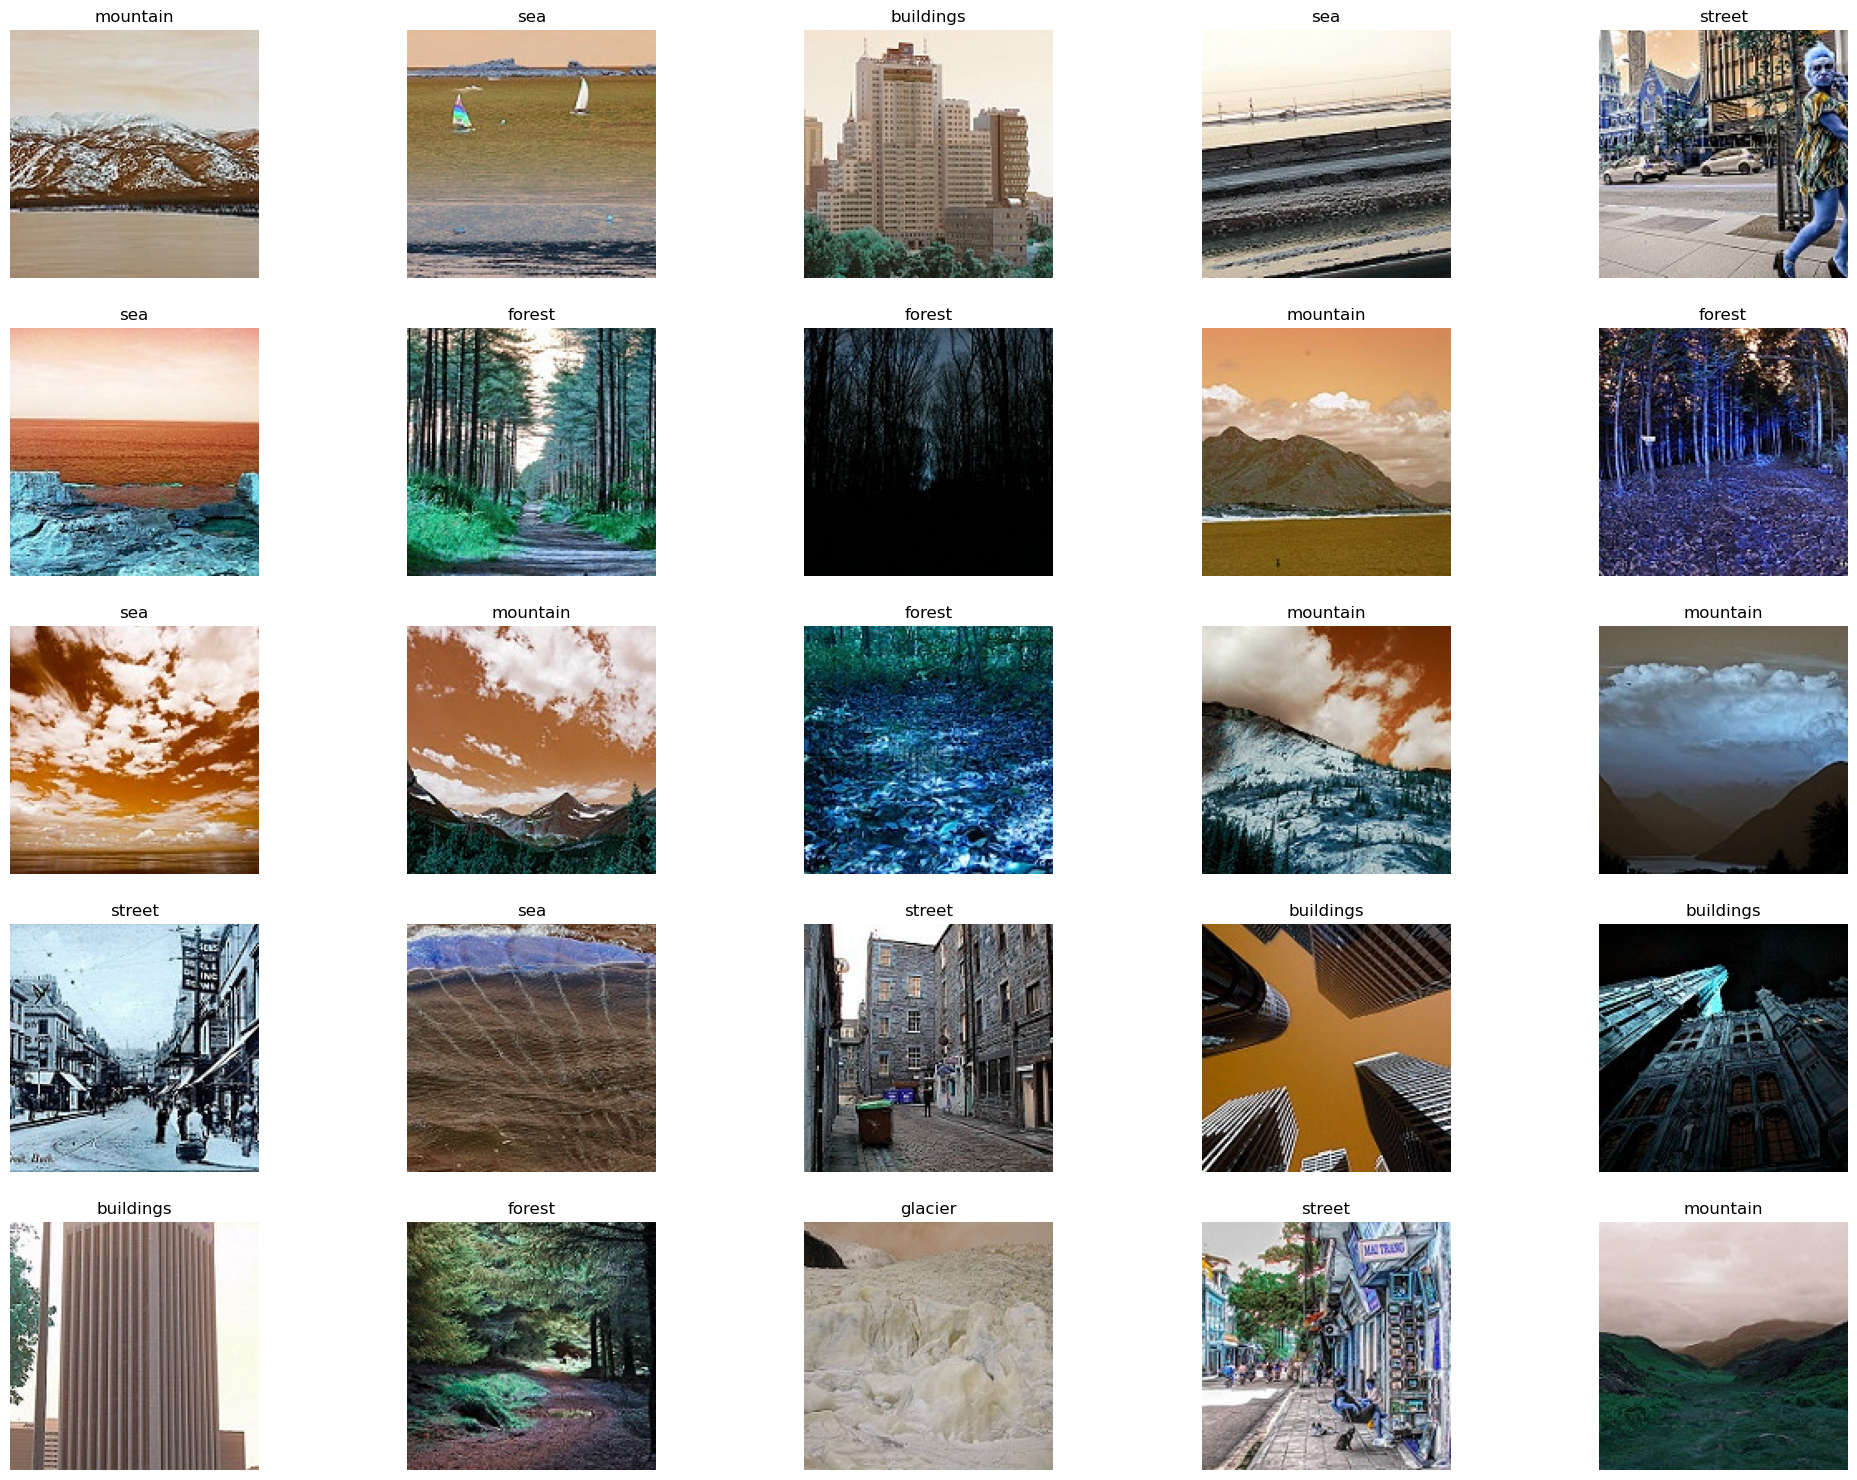

In [5]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(getclabel(Labels[rnd_number]))
        ax[i,j].axis('off')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 200)     5600      
                                                                 
 conv2d_7 (Conv2D)           (None, 146, 146, 180)     324180    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 180)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 27, 27, 180)       291780    
                                                                 
 conv2d_9 (Conv2D)           (None, 25, 25, 140)       226940    
                                                                 
 conv2d_10 (Conv2D)          (None, 23, 23, 100)       126100    
                                                      

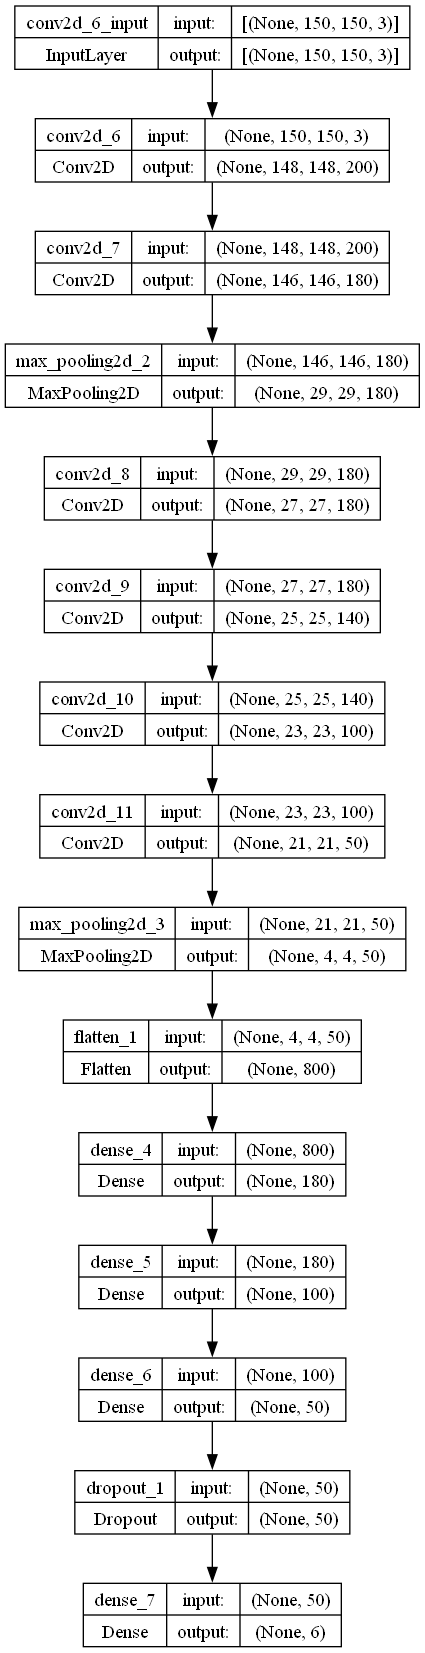

In [8]:
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.utils import plot_model
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

model = models.Sequential()

model.add(layers.Conv2D(200, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.Conv2D(180, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(5,5))
model.add(layers.Conv2D(180, kernel_size=(3,3), activation='relu'))
model.add(layers.Conv2D(140, kernel_size=(3,3), activation='relu'))
model.add(layers.Conv2D(100, kernel_size=(3,3), activation='relu'))
model.add(layers.Conv2D(50, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(5,5))
model.add(layers.Flatten())
model.add(layers.Dense(180, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(6, activation='softmax'))

model.compile(optimizer=optimizers.Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))
plot_model(model, to_file='model.png', show_shapes=True)


In [33]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install graphviz

     -------------------------------------- 47.0/47.0 kB 261.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/imann/Downloads/windows_10_msbuild_Release_graphviz-9.0.0-win32/Graphviz/bin/'  # Adjust the path based on your Graphviz installation directory

# Your existing code here
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import model_to_dot
from IPython.display import SVG



In [9]:
trained = model.fit(Images,Labels,epochs=2,validation_split=0.30)

Epoch 1/2
307/307 [==============================] - 3699s 12s/step - loss: 1.9295 - accuracy: 0.1681 - val_loss: 1.7915 - val_accuracy: 0.1807
Epoch 2/2
307/307 [==============================] - 3732s 12s/step - loss: 1.7912 - accuracy: 0.1819 - val_loss: 1.7501 - val_accuracy: 0.1525


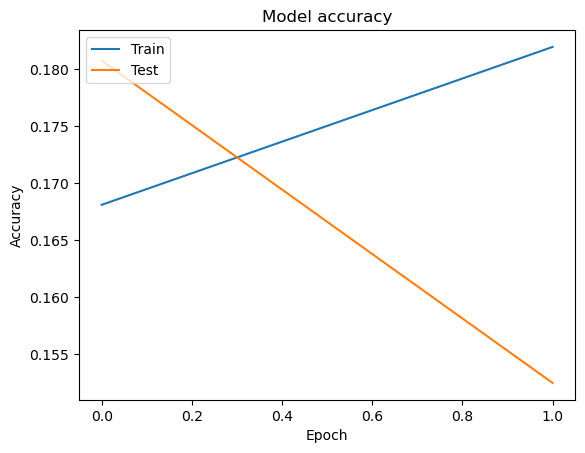

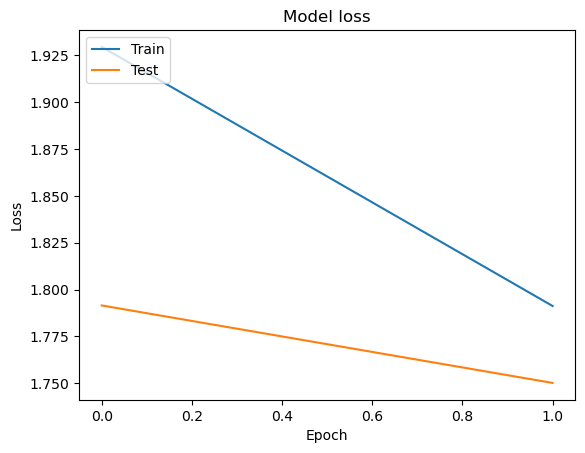

In [12]:
import matplotlib.pyplot as plt

# Assuming 'accuracy' is the correct key for accuracy in your training history
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [14]:
test_images,test_labels = getimg('C:/Users/imann/Downloads/ml/seg_test/seg_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

Processing: C:/Users/imann/Downloads/ml/seg_test/seg_test/buildings\20057.jpg
Successfully read image: C:/Users/imann/Downloads/ml/seg_test/seg_test/buildings\20057.jpg
Processing: C:/Users/imann/Downloads/ml/seg_test/seg_test/buildings\20060.jpg
Successfully read image: C:/Users/imann/Downloads/ml/seg_test/seg_test/buildings\20060.jpg
Processing: C:/Users/imann/Downloads/ml/seg_test/seg_test/buildings\20061.jpg
Successfully read image: C:/Users/imann/Downloads/ml/seg_test/seg_test/buildings\20061.jpg
Processing: C:/Users/imann/Downloads/ml/seg_test/seg_test/buildings\20064.jpg
Successfully read image: C:/Users/imann/Downloads/ml/seg_test/seg_test/buildings\20064.jpg
Processing: C:/Users/imann/Downloads/ml/seg_test/seg_test/buildings\20073.jpg
Successfully read image: C:/Users/imann/Downloads/ml/seg_test/seg_test/buildings\20073.jpg
Processing: C:/Users/imann/Downloads/ml/seg_test/seg_test/buildings\20074.jpg
Successfully read image: C:/Users/imann/Downloads/ml/seg_test/seg_test/buildi

[1.7525500059127808, 0.1340000033378601]

In [18]:
pred_images,no_labels = getimg('C:/Users/imann/Downloads/ml/seg_pred/seg_pred')
pred_images = np.array(pred_images)
pred_images.shape

(0,)

In [19]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_classlabel(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


fig.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 3000x3000 with 0 Axes>